In [13]:
%load_ext autoreload
%autoreload 2

import os, sys, shutil
import numpy as np
import pandas as pd
import multiprocessing as mp
import matplotlib.pyplot as plt
from glob import glob

from tqdm.autonotebook import tqdm

import zeebe_model

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
params = {'RADIUS': 250,  # Radius of foram
          'CO3UPT': 0,#3.0e-9 / 3600.,  # foram CO3 uptake
          'CO2UPT':0,#- 2.0e-9 / 3600.,  # foram CO2 uptake
          'HCO3UPT':0,# - 2.0e-9 / 3600.,  # foram HCO3 uptake
          'PHBULK': 8.063,  # pH of bulk solution
          'DICBULK': 4035.,  # DIC of bulk solution
          'UALKBULK': 4671.,  # Alkalinity of bulk solution
          'SYMCO2UPT': 0,  # symbiont CO2 uptake
          'SYMHCO3UPT': 0,  # symbiont CO3 uptake
          'SYMTCUPT': 12e-9 / 3600.,  # symbiont total C uptake
          'VMAX': 12e-8 / 3600.,  # Michaelis-Menten Vmax
          'SYMDIST': 500.,  # Distance of symbionts from shell surface
          'REDS': 1.,  # Redfield ratio of symbionts
          'SALINITY': 33.3,  # Salinity... obv
          'TEMP': 22.}  # Temp ºC
params['BORTBULK'] = 5 * (432 * params['SALINITY']/35)  # boron total in solution, adjusted for salinity



In [3]:
d, _ = zeebe_model.run(params)

In [4]:
d.head()

,ca,o2,boh4,boh3,co3,co2,hco3,oh,h,pH,dic,alk
r,,,,,,,,,,,,
250.000000,10300.0,210.0,682.2476,1404.828,648.7966,0.655360,2979.653,9.554362,0.004680,8.329740,3629.104960,4969.048162
252.252252,10300.0,210.0,682.2366,1404.838,648.7853,0.655836,2979.682,9.554143,0.004680,8.329728,3629.123136,4969.043343
254.504505,10300.0,210.0,682.2040,1404.866,648.7521,0.657233,2979.767,9.553491,0.004681,8.329693,3629.176333,4969.028691
256.756757,10300.0,210.0,682.1502,1404.913,648.6980,0.659490,2979.907,9.552415,0.004681,8.329636,3629.264490,4969.005615
259.009009,10300.0,210.0,682.0756,1404.979,648.6240,0.662554,2980.099,9.550925,0.004682,8.329558,3629.385554,4968.973525


In [5]:
l=[]
for i in d.co3:
    print(i)
    l.append(i)

609.0996
609.0904
609.0632
609.019
608.9584
608.8822
608.791
608.6856
608.5665
608.4342
608.2892
608.132
607.9632
607.783
607.592
607.3905
607.1789
606.9575
606.7268
606.4869
606.2384
605.9813
605.7162
605.4431
605.1624
604.8744
604.5793
604.2773
603.9688
603.6538
603.3327
603.0056
602.6728
602.3344
601.9907
601.6417
601.2878
600.9291
600.5657
600.1978
599.8255
599.4491
599.0687
598.6843
598.2962
597.9045
597.5094
597.1108
596.709
596.3041
595.8962
595.4854
595.0718
594.6556
594.2367
593.8154
593.3918
592.9658
592.5377
592.1074
591.6751
591.2409
590.8048
590.367
589.9274
589.4862
589.0435
588.5993
588.1536
587.7067
587.2584
586.8089
586.3582
585.9064
585.4536
584.9997
584.5449
584.0893
583.6328
583.1755
582.7174
582.2587
581.7993
581.3393
580.8787
580.4176
579.9561
579.4941
579.0316
578.5688
578.1057
577.6423
577.1786
576.7147
576.2506
575.7863
575.3219
574.8574
574.3928
573.9282
573.4635
572.9988
572.5342
572.0696
571.6051
571.1407
570.6764
570.2123
569.7483
569.2846
568.821
568.3577


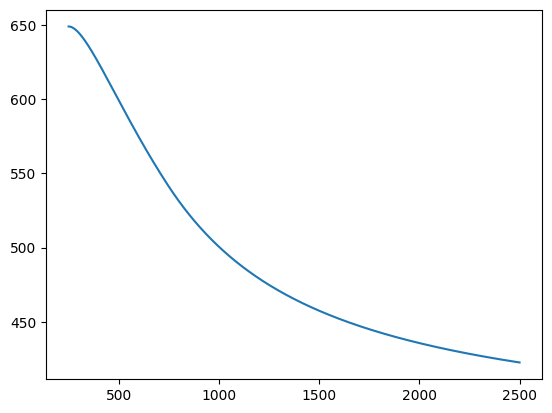

In [15]:
plt.plot(d.index,d.co3)

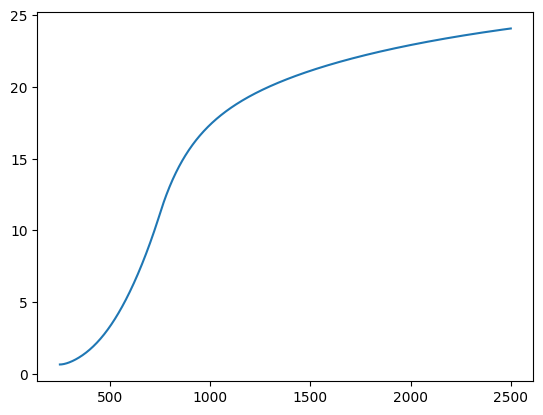

In [16]:
plt.plot(d.index, d.co2)

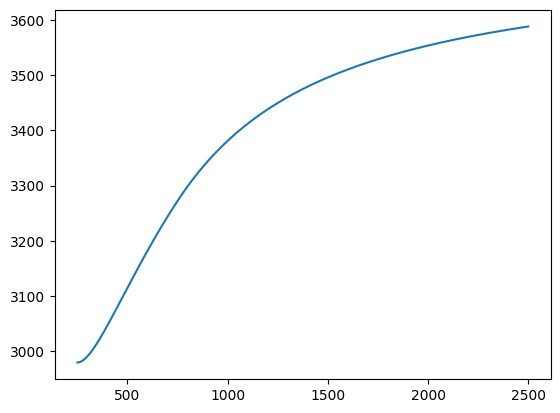

In [17]:
plt.plot(d.index, d.hco3)

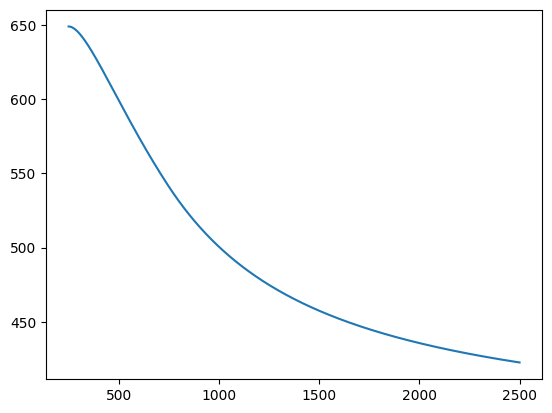

In [18]:
plt.plot(d.index, d.co3)

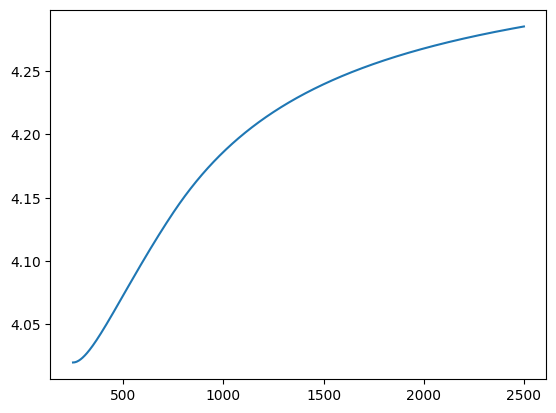

In [9]:
poh=d.oh*10e-6
poh=-np.log10(poh)
plt.plot(d.index, poh)

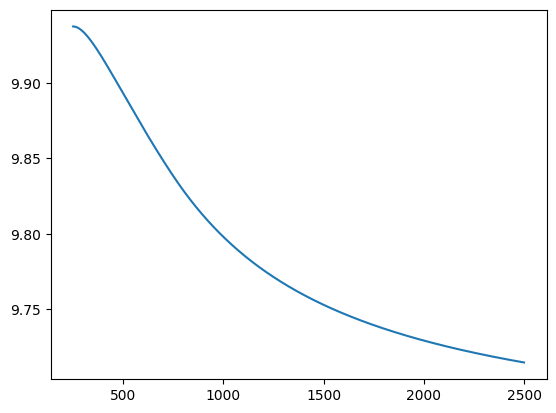

In [22]:
plt.plot(d.index, 14-poh)

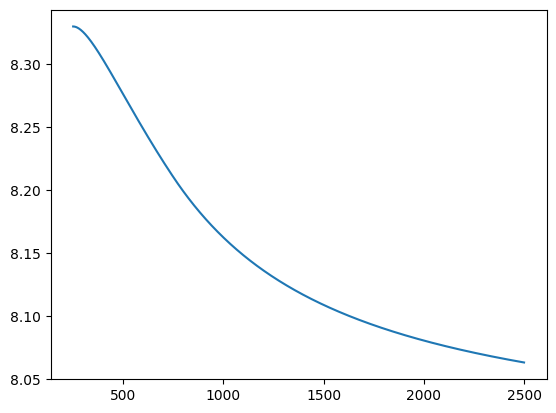

In [10]:
plt.plot(d.index, d.pH)

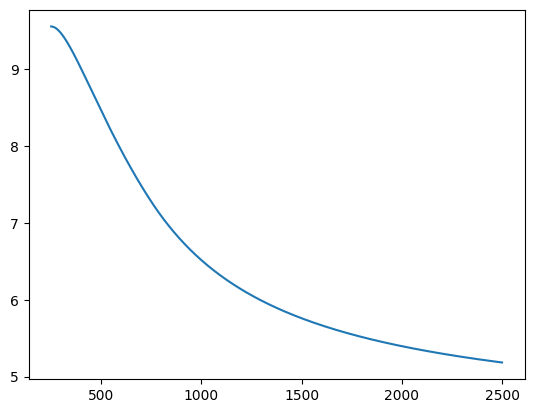

In [11]:
plt.plot(d.index, d.oh)

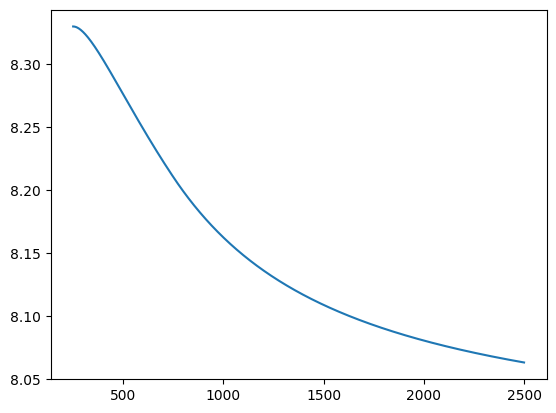

In [12]:
plt.plot(d.index, d.pH)

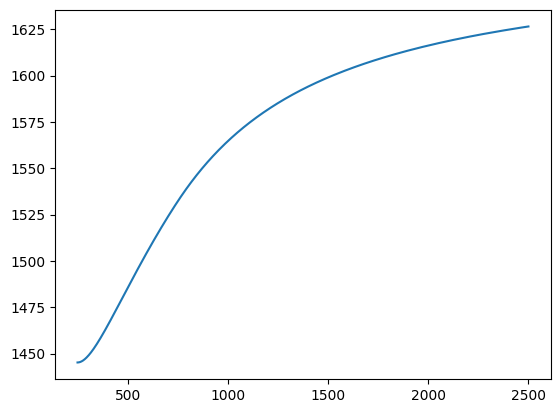

In [17]:
plt.plot(d.index, d.boh3)

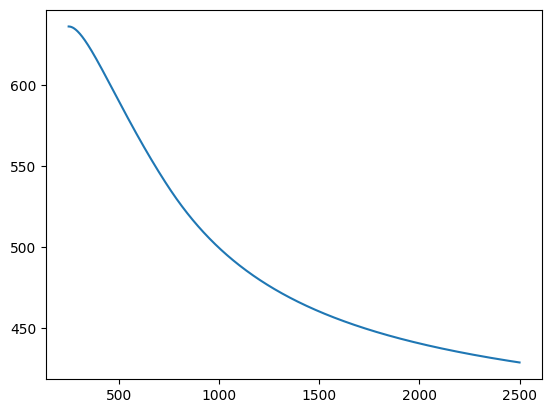

In [18]:
plt.plot(d.index, d.boh4)

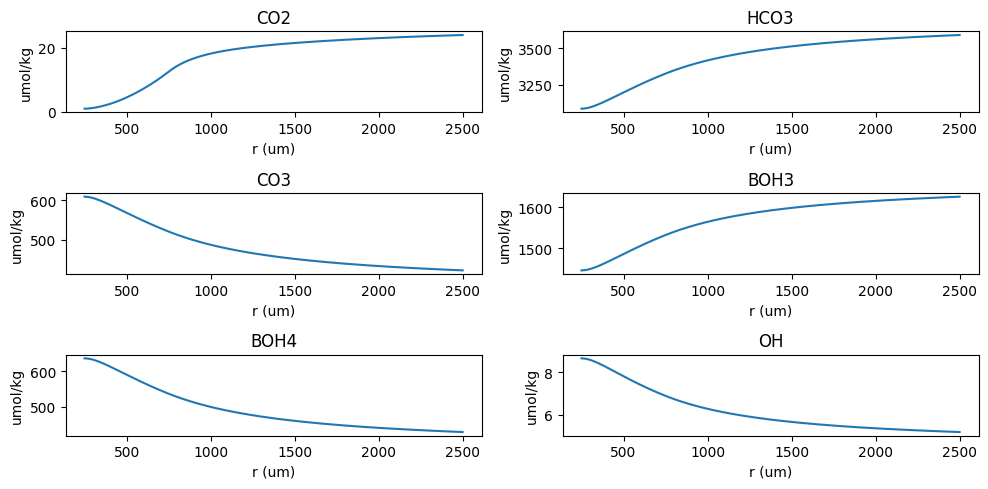

In [243]:
fig, ax = plt.subplots(3, 2, figsize=(10, 5))
ax[0, 0].plot(d.index, d.co2)
ax[0, 0].set_title('CO2')
ax[0, 1].plot(d.index, d.hco3)
ax[0, 1].set_title('HCO3')
ax[1, 0].plot(d.index, d.co3)
ax[1, 0].set_title('CO3')
ax[1, 1].plot(d.index, d.boh3 )
ax[1, 1].set_title('BOH3')
ax[2, 0].plot(d.index, d.boh4)
ax[2, 0].set_title('BOH4')
ax[2, 1].plot(d.index, d.oh)
ax[2, 1].set_title('OH')

ax[0, 0].set_ylabel('umol/kg')
ax[0, 1].set_ylabel('umol/kg')
ax[1, 0].set_ylabel('umol/kg')
ax[1, 1].set_ylabel('umol/kg')
ax[2, 0].set_ylabel('umol/kg')
ax[2, 1].set_ylabel('umol/kg')

ax[0, 0].set_xlabel('r (um)')
ax[0, 1].set_xlabel('r (um)')
ax[1, 0].set_xlabel('r (um)')
ax[1, 1].set_xlabel('r (um)')
ax[2, 0].set_xlabel('r (um)')
ax[2, 1].set_xlabel('r (um)')
plt.tight_layout()
plt.savefig('Wolf_Gladrow.png',format='png',dpi=2000)
plt.show()




## Running as a module?

This will be a *pain* to set up becaus individual variables are used to set global parameters

In [233]:
d,_ = zeebe_model.run(params, modelname='module_test.c', template='zeebe_model/resources/solvde42_py_module.c')

module_test.c:284:1: warning: '/*' within block comment [-Wcomment]
/* -----   Order of equations   ----- */
^
module_test.c:5743:1: warning: return type of 'main' is not 'int' [-Wmain-return-type]
void main(int argc,char *argv[])
^
module_test.c:5743:1: note: change return type to 'int'
void main(int argc,char *argv[])
^~~~
int
2 warnings generated.


33.300000  salinity [psu] (input)    
22.000000  temperature [C] (input)   
8.063000  pH-bulk (input)           
4035.000000   dicbulk    [mumol/kg] 
24.061856   co2bulk    [mumol/kg] 
3588.183336  hco3bulk    [mumol/kg] 
422.754808   co3bulk    [mumol/kg] 
2055.085714  total boron [mumol/kg] 
1626.474134  boh3bulk    [mumol/kg] 
428.611580  boh4bulk    [mumol/kg] 
--- before solvde --- 

-----  before iteration ------
0 co2negflag
1 it
3.000000e-09 vmaxit

   Iter.     Error       FAC
     1     0.059605    1.000000

-----  before iteration ------
0 co2negflag
2 it
6.000000e-09 vmaxit

   Iter.     Error       FAC
     2     0.053550    1.000000

-----  before iteration ------
0 co2negflag
3 it
9.000000e-09 vmaxit

   Iter.     Error       FAC
     3     0.047873    1.000000

-----  before iteration ------
0 co2negflag
4 it
1.000000e-08 vmaxit

   Iter.     Error       FAC
     4     0.015537    1.000000

-----  before iteration ------
0 co2negflag
5 it
1.000000e-08 vmaxit

   Iter.  

In [168]:
import ctypes

In [169]:
zeebe_model.boilerplate.make_runfile(params, outpath='zeebe_model/test_module/tmp.c', template='zeebe_model/resources/solvde42_py_module.c')